In [1]:
#importing of Libraries
import pandas as pd
import seaborn as sns
from datetime import datetime  #pip install datetime
import calendar  #pip install calendra
import matplotlib.pyplot as plt

In [5]:
#importing of Dataset
df = pd.read_csv(r'C:\Users\Sumanth\OneDrive\Desktop\python_brillica\911.csv')
print(df.head(5))

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & 

In [6]:
#now Extract the Datetime 
df['timeStamp'] = df['timeStamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
df['Year'] = df['timeStamp'].apply(lambda t: t.year)
df['Month'] = df['timeStamp'].apply(lambda t: calendar.month_name[t.month])
df['Day'] = df['timeStamp'].apply(lambda t: t.day)
df['Date'] = df['timeStamp'].apply(lambda t: t.date())


In [7]:
#now spliting the title into type 
df['type'] = df['title'].apply(lambda t: t.split(':')[0])
print(df.columns)

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Year', 'Month', 'Day', 'Date', 'type'],
      dtype='object')


In [8]:
#compare the changes
print(df[['title','type']].head(5))
print(df[['timeStamp','Year','Month','Day','Date']].head(5))

                     title  type
0   EMS: BACK PAINS/INJURY   EMS
1  EMS: DIABETIC EMERGENCY   EMS
2      Fire: GAS-ODOR/LEAK  Fire
3   EMS: CARDIAC EMERGENCY   EMS
4           EMS: DIZZINESS   EMS
            timeStamp  Year     Month  Day        Date
0 2015-12-10 17:10:52  2015  December   10  2015-12-10
1 2015-12-10 17:29:21  2015  December   10  2015-12-10
2 2015-12-10 14:39:21  2015  December   10  2015-12-10
3 2015-12-10 16:47:36  2015  December   10  2015-12-10
4 2015-12-10 16:56:52  2015  December   10  2015-12-10


In [9]:
#drop the timestamp from the dataset
print(df.drop('timeStamp', axis=1, inplace=True))
print(df.columns)
print(df.shape)
print(df.head())

None
Index(['lat', 'lng', 'desc', 'zip', 'title', 'twp', 'addr', 'e', 'Year',
       'Month', 'Day', 'Date', 'type'],
      dtype='object')
(423909, 13)
         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title                twp  \
0  19525.0   EMS: BACK PAINS/INJURY        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY         NORRISTOWN   
4      NaN           EMS: DIZZINESS   LOWER POTTSGROVE   

                         addr

In [10]:
#cleaning of Nan Na  values in all the attributes
df = df.dropna(how='any', axis=0)
print(df.head(10))
print(df.shape)

          lat        lng                                               desc  \
0   40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1   40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2   40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3   40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
5   40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   
6   40.182111 -75.127795  LAUREL AVE & OAKDALE AVE;  HORSHAM; Station 35...   
7   40.217286 -75.405182  COLLEGEVILLE RD & LYWISKI RD;  SKIPPACK; Stati...   
8   40.289027 -75.399590  MAIN ST & OLD SUMNEYTOWN PIKE;  LOWER SALFORD;...   
9   40.102398 -75.291458  BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...   
11  40.084161 -75.308386  BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...   

        zip                        title                twp  \
0   19525.0       EMS: BACK PAINS/INJURY        NEW HANOVER   
1   

In [11]:
#Diffrent types of calls
print(df['type'].value_counts())

EMS        190278
Traffic    125370
Fire        56063
Name: type, dtype: int64


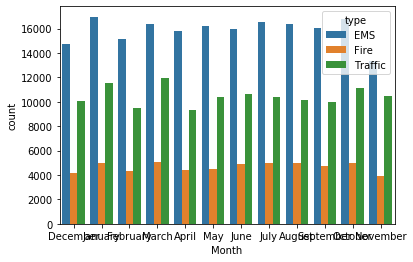

In [12]:
#visualizing the graph
plt.show(sns.countplot(x='Month' , data=df, hue='type'))

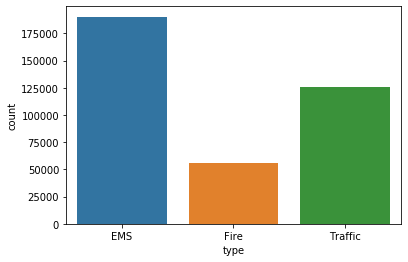

In [13]:
plt.show(sns.countplot(x='type',data=df))


